In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
def zRot(theta):
    rotmat = np.array(
        [ 
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta),
            np.cos(theta),
            0, 
            0,
            0,
            1
        ]
    ).reshape(3,3)
    return rotmat

def yRot(theta):
    rotmat = np.array(
        [
            np.cos(theta),
            0,
            np.sin(theta),
            0,
            1,
            0,
            -np.sin(theta),
            0,
            np.cos(theta)
        ]
    ).reshape(3,3)
    
    return rotmat

def xRot(theta):
    rotmat = np.array(
        [
            1,
            0,
            0,
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta), 
            np.cos(theta),
            0
        ]
    ).reshape(3,3)
    
    return rotmat

In [3]:
plane=0
oxygen_shift = np.array([0,0,0])
oxygen_shift[plane] = 1
print(oxygen_shift)

[1 0 0]


In [4]:
def ringMaker(d, N, rotmat,oxygen_positions=[],plane=0 , xshift = False, yshift = False, zshift = False):
    """ function to make rings of a specified size
    parameters:
    d: float
        the distance between nodes of the ring
    rotmat: func
        the rotation matrix function to implement (axis orthogonal to plane of 
        ring)
    shifts: bool
        shifts the ring by its radius in the positive direction
    plots: bool
        plot the 2d ring positions
    write: bool
        write the ring positions into an xyz file
    fname: str
        name of the file output. SHOULD INCLUDE THE FILENAME EXTENSION (.xyz) 
    plane describes th eplane that the ring is on (0 for yz, 1 fo xz and 2 xy)
    """
    # distance between clusters
    # angle between clusters:
    theta = 2*np.pi/N
    # radius of each ring:
    r = N*d/(2*np.pi)
    n_oxygen = len(oxygen_positions)
    p = np.zeros((N+2*n_oxygen, 3)) #accounting for hydrogens too
    p[:, :] = [-r, 0, 0]
    
    oxygen_shift = [0,0,0]
    oxygen_shift[plane] = d
    hydrogen_shift = [0,0,0]
    hydrogen_shift[plane]=2*d
    # calc angles to rotate initial ring position about the given axis
    angles = np.arange(0, N)*theta

    # iterate through all nodes and generate positions by rotation
    for i in range(N):
        theta_i = angles[i]
        rot = rotmat(theta_i)
        p[i, :] = np.dot(rot, p[i, :])
    for i in range(n_oxygen):
        oxygen_ind = i+N
        p[oxygen_ind,:] = p[oxygen_positions[i],:] + oxygen_shift
    for i in range(n_oxygen):
        hydrogen_ind = i+N+ n_oxygen
        p[hydrogen_ind,:] = p[oxygen_positions[i],:] + hydrogen_shift
    # translate the ring by shift
    if xshift:
        p[:, :] += [xshift, 0, 0]
    if yshift:
        p[:, :] += [0, yshift, 0]
    if yshift:
        p[:, :] += [0, 0, zshift ]
    return p,r

def visualize_ring(p,xyPlot=False,yzPlot=False,xzPlot=False):
    if xyPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 1])
        plt.ylabel("y-axis")
        plt.xlabel("x-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if yzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 1], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if xzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()


def visualize_rings(rings,xyPlot=False,yzPlot=False,xzPlot=False):
    plt.figure()
    ax = plt.axes(projection='3d')
    for ring in rings:
        ax.scatter3D(ring[:,0], ring[:,1],ring[:,2], cmap='Greens')
        ax.plot3D(ring[:,0], ring[:,1],ring[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ##ax.set_xlim([-30,30])
    #ax.set_ylim([-30,30])
    #ax.set_zlim([-30,30])
    ax.set_title("Initial positions of Catenane Molecules")
    

In [4]:
%matplotlib widget


[0.2, 0, 0]
[[-1.59154943e-01 -1.59154943e-01  0.00000000e+00]
 [-1.59154943e-01 -1.28759054e-01  9.35489284e-02]
 [-1.59154943e-01 -4.91815822e-02  1.51365346e-01]
 [-1.59154943e-01  4.91815822e-02  1.51365346e-01]
 [-1.59154943e-01  1.28759054e-01  9.35489284e-02]
 [-1.59154943e-01  1.59154943e-01  1.94908592e-17]
 [-1.59154943e-01  1.28759054e-01 -9.35489284e-02]
 [-1.59154943e-01  4.91815822e-02 -1.51365346e-01]
 [-1.59154943e-01 -4.91815822e-02 -1.51365346e-01]
 [-1.59154943e-01 -1.28759054e-01 -9.35489284e-02]
 [-5.91549431e-02 -1.28759054e-01  9.35489284e-02]
 [-5.91549431e-02 -4.91815822e-02  1.51365346e-01]
 [-5.91549431e-02  4.91815822e-02  1.51365346e-01]
 [ 4.08450569e-02 -1.28759054e-01  9.35489284e-02]
 [ 4.08450569e-02 -4.91815822e-02  1.51365346e-01]
 [ 4.08450569e-02  4.91815822e-02  1.51365346e-01]]


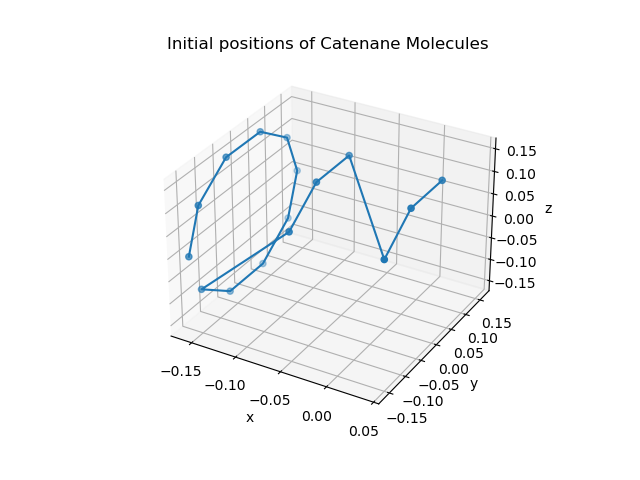

In [5]:
N_small = 10
p_small,r_small = ringMaker(d = 0.1, N = N_small, rotmat = xRot,oxygen_positions=[-1],plane=0,yshift=0,xshift = 0,zshift=0)
visualize_rings([p_small])
print(p_small)

In [10]:
def write_pdb(molecule_coordinate_sets,fname,description,res_names,oxygen_locations=[[-1],[-1]]):
    #molecule_coordinate_sets Is a list of matrices containing coordinates
    #res_names is a list of the residue names
    #fname is the file name to write to
    #description is a description of the file contents
    
    pdb_headers = [
            "Record", #1
            "Atom Number",#2
            "Atom Name",#3
            "Alternate location indicator",#4
            "residue name",#5
            "Chain",#6
            "Residue Sequence Number",#7
            "Code for insertions of residue",#8
            "x",#9
            "y",#10
            "z",#11
            "occupancy",#12
            "temperature factor", #13
            "element symbol", #14
            "charge of atom" #15
        ]
    atom_start_index = 0
    res_sequence_number = 1
    full_pdb_df = pd.DataFrame(columns = pdb_headers)
    n_atoms =0
    
    for i,molecule_coordinate_set in enumerate(molecule_coordinate_sets):
        specific_ring_oxygen_locations = oxygen_locations[i]
        
        n_atoms = np.shape(molecule_coordinate_set)[0]
        if specific_ring_oxygen_locations[0] != -1:
            n_oxygen = len(specific_ring_oxygen_locations)
            n_hydrogen = n_oxygen
        else:
            n_oxygen = 0
            n_hydrogen = 0
        n_carbon = n_atoms - n_oxygen - n_hydrogen
        specific_ring_oxygen_locations = [location + n_atoms for location in specific_ring_oxygen_locations]
        res_name = res_names[i]
        
        print(n_carbon)
        print(n_atoms)
        #Creating dataframe object containing all pdb formatting 
        
        pdb_df = pd.DataFrame(columns = pdb_headers)
        atom_number= []
        atom_name=[]
        element_symbol=[]
        
        for i in range(n_atoms):
            atom_num = atom_start_index+i+1
            atom_number.append(atom_num)
            if i < n_carbon:
                atom_name.append(f"C{atom_num}")
                element_symbol.append("C")
            elif i < n_carbon+n_oxygen:
                atom_name.append(f"O{atom_num}")
                element_symbol.append("O")
            else:
                atom_name.append(f"H{atom_num}")
                element_symbol.append("H")
        pdb_df["Record"] = ["HETATM" for i in range(n_atoms)]
        pdb_df["Atom Number"] = atom_number
        pdb_df["Atom Name"] = atom_name
        pdb_df["Alternate location indicator"] =["" for i in range(n_atoms)]
        pdb_df["residue name"] = [res_name for i in range(n_atoms)]
        pdb_df["Chain"] = ["A" for i in range(n_atoms)]
        pdb_df["Residue Sequence Number"] = [res_sequence_number for i in range(n_atoms)]
        pdb_df["Code for insertions of residue"] = ["" for i in range(n_atoms)]
        pdb_df["x"] = molecule_coordinate_set[:,0] #float
        pdb_df["y"] = molecule_coordinate_set[:,1] #float
        pdb_df["z"] = molecule_coordinate_set[:,2] #float
        pdb_df["occupancy"] = [1 for i in range(n_atoms)] #float
        pdb_df["temperature factor"] = [0 for i in range(n_atoms)]
        pdb_df["element symbol"] = element_symbol
        pdb_df["charge of atom"] = ["" for i in range(n_atoms)]
        
        if len(molecule_coordinate_sets) >1:
            atom_start_index += n_atoms
            res_sequence_number += 1
        
        full_pdb_df = pd.concat([full_pdb_df, pdb_df], axis=0)
    #extracting data values for file writing
    data = full_pdb_df.values
    
    
    #writing file
    OUT=open(f"./pdb_files/{fname}.pdb",'w')
    outline = f"HEADER    {description}"
    OUT.write(outline+"\n")
    outline = f"MODEL     1"
    OUT.write(outline+"\n")
    for index, line in enumerate(data):
        #s-> str d_. int %f -> float
        outline="{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}".format(
            line[0],
            line[1],
            line[2],
            line[3],
            line[4],
            line[5],
            line[6],
            line[7],
            line[8],
            line[9],
            line[10],
            line[11],
            line[12],
            line[13],
            line[14]
        )
        OUT.write(outline+"\n")
    outline = "{:6s}{:5d}".format("TER",atom_start_index+n_atoms+1)
    OUT.write(outline+"\n")
    outline = "{:6s}".format("END")
    OUT.write(outline+"\n")
    
    return full_pdb_df
    

[0, 0, 0.2]
[0.2, 0, 0]
10
10
200
200


,Record,Atom Number,Atom Name,Alternate location indicator,residue name,Chain,Residue Sequence Number,Code for insertions of residue,x,y,z,occupancy,temperature factor,element symbol,charge of atom
0,HETATM,1,C1,,SM,A,1,,-0.159155,3.023944,0.000000,1,0,C,
1,HETATM,2,C2,,SM,A,1,,-0.159155,3.054340,0.093549,1,0,C,
2,HETATM,3,C3,,SM,A,1,,-0.159155,3.133917,0.151365,1,0,C,
3,HETATM,4,C4,,SM,A,1,,-0.159155,3.232280,0.151365,1,0,C,
4,HETATM,5,C5,,SM,A,1,,-0.159155,3.311858,0.093549,1,0,C,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,HETATM,206,C206,,LG,A,2,,-3.143910,-0.497946,0.000000,1,0,C,
196,HETATM,207,C207,,LG,A,2,,-3.157999,-0.398948,0.000000,1,0,C,
197,HETATM,208,C208,,LG,A,2,,-3.168972,-0.299556,0.000000,1,0,C,
198,HETATM,209,C209,,LG,A,2,,-3.176818,-0.199868,0.000000,1,0,C,


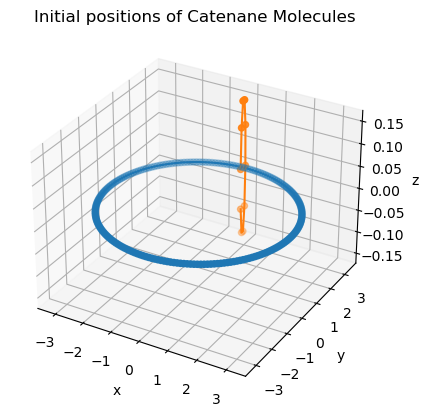

In [12]:
#Parameter definition

fname="combined_rings"

oxygen_locations = [
    [-1], #Small ring
    [-1]  #Large Ring
]

res_names = ["SM","LG"]

N_small = 10 
N_large = 200
description = f"interlinked with {N_small} atoms spaced evenly around a circle for the small ring and {N_large} for the large ring with 3 hydrogen binding spots on each ring" 

#Ring definitions
p_large,r_large= ringMaker(d = 0.1, N = N_large, rotmat = zRot,plane=2,yshift=0,xshift = 0,zshift=0)
p_small,r_small = ringMaker(d = 0.1, N = N_small, rotmat = xRot,plane=0,yshift=r_large,xshift = 0,zshift=0)



#Creating small ring offset in y
molecule_coordinate_sets=[p_small,p_large]
combined_ring_pdb_df= write_pdb(molecule_coordinate_sets,fname,description,res_names,oxygen_locations)

display(combined_ring_pdb_df)

visualize_rings([p_large,p_small])


In [8]:
%matplotlib widget


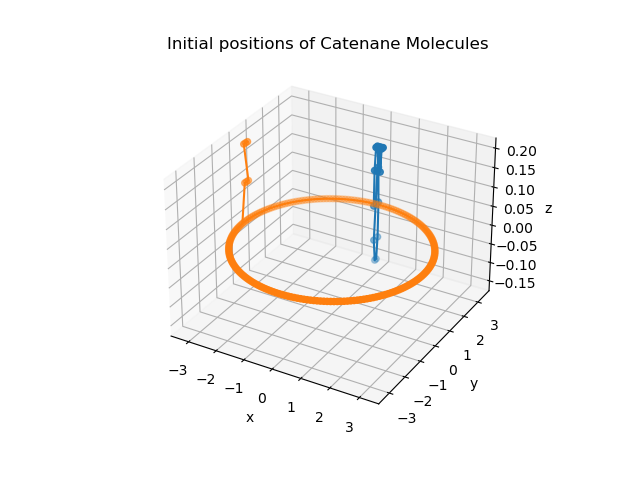

In [9]:
plt.close()
visualize_rings([p_small,p_large])



In [38]:
harmonic_angle_large = [
    '\n\t<HarmonicAngleForce>',
    '\n\t\t<Angle class1="C_L" class2="C_L" class3="C_L" angle="3.11" k="50"/>',
    '\n\t</HarmonicAngleForce>'
]
harmonic_angle_small = [
    '\n\t<HarmonicAngleForce>',
    '\n\t\t<Angle class1="C_S" class2="C_S" class3="C_S" angle="2.51" k="100"/>',
    '\n\t</HarmonicAngleForce>',
]
FENE_potential = [
    '\n\t<CustomBondForce energy="(-(K*(R_o)^2)/2)*log(1- (r/R_o)^2)">',
    '\n\t\t<GlobalParameter name = "K" defaultValue = 30>',
    '\n\t\t<GlobalParameter name = "R_o" defaultValue = 1.5>',
    '\n\t\t<Bond class1="C_S" class2 = "C_S" />',
    '\n\t\t<Bond class1="C_L" class2 = "C_L" />',
    '\n\t</CustomBondForce>'
]

custom_LJ = [
    '\n\t<CustomNonbondedForce energy="4*eps*((sigma/r)^12+(sigma/r)^6+1/4)" bondCutoff="1.12">',
    '\n\t\t<GlobalParameter name="eps" defaultValue="1"/>',
    '\n\t\t<GlobalParameter name="sigma" defaultValue="1"/>',
    '\n\t</CustomNonbondedForce>'
]

bonding_forces = harmonic_angle_large+harmonic_angle_small+FENE_potential+custom_LJ

bottom_file_template = f'\n\t</Residues>{"".join(bonding_forces)}\n</ForceField>'
print(bottom_file_template)


	</Residues>
	<HarmonicAngleForce>
		<Angle class1="C_L" class2="C_L" class3="C_L" angle="3.11" k="50"/>
	</HarmonicAngleForce>
	<HarmonicAngleForce>
		<Angle class1="C_S" class2="C_S" class3="C_S" angle="2.51" k="100"/>
	</HarmonicAngleForce>
	<CustomBondForce energy="(-(K*(R_o)^2)/2)*log(1- (r/R_o)^2)">
		<GlobalParameter name = "K" defaultValue = 30>
		<GlobalParameter name = "R_o" defaultValue = 1.5>
		<Bond class1="C_S" class2 = "C_S" />
		<Bond class1="C_L" class2 = "C_L" />
	</CustomBondForce>
	<CustomNonbondedForce energy="4*eps*((sigma/r)^12+(sigma/r)^6+1/4)" bondCutoff="1.12">
		<GlobalParameter name="eps" defaultValue="1"/>
		<GlobalParameter name="sigma" defaultValue="1"/>
	</CustomNonbondedForce>
</ForceField>


In [42]:
#xml_template = open("./pdb_files/forcefield.txt", "r")
#print(xml_template.read())
#\n\t\t<Residue name="small">'
def generate_bond_and_atom_tags(pdb_df,residue_names,oxygen_locations):
    n_residues = len(pdb_df["residue name"].unique())
    set_of_atom_tags = []
    set_of_bond_tags = []
    for residue_i in range(n_residues):
        residue_oxygen_locations = oxygen_locations[residue_i]
        atom_tags=""
        bond_tags=""
        min_residue_atom_number = pdb_df["Atom Number"][pdb_df["residue name"]==residue_names[residue_i]].min()
        n = len(pdb_df["Atom Name"][pdb_df["residue name"]==residue_names[residue_i]])
        atom_names = pdb_df["Atom Name"][pdb_df["residue name"]==residue_names[residue_i]]
        
        n_atoms = pdb_df["Atom Name"][(pdb_df["residue name"]==residue_names[residue_i])]
        n_carbon = len(pdb_df["Atom Name"][(pdb_df["residue name"]==residue_names[residue_i]) & (pdb_df["element symbol"]=="C")])
        n_oxygen = len(residue_oxygen_locations) if residue_oxygen_locations[0] != -1 else 0 
        print(residue_oxygen_locations)
        n_hydrogen = n_oxygen
        for i in range(n_carbon):
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i]}" type = "{residue_i}"/>'
            if i+min_residue_atom_number == n_carbon+min_residue_atom_number-1:
                bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i]}" atomName2 = "{atom_names[0]}"/>'
            else:
                bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i]}" atomName2 = "{atom_names[i+1]}"/>'
        for i in range(n_oxygen):
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i+n_carbon]}" type = "1"/>' #for oxygens
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i+n_carbon+ n_oxygen]}" type = "2"/>' #for hydrogens
                            
            bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[residue_oxygen_locations[i]]}" atomName2 = "{atom_names[i+n_carbon]}"/>'
            bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i+n_carbon]}" atomName2 = "{atom_names[i+n_carbon+ n_oxygen]}"/>' #oxygen to hydrogen bond
            

        set_of_atom_tags.append(atom_tags)
        set_of_bond_tags.append(bond_tags)
    return set_of_atom_tags,set_of_bond_tags



def write_forcefield_xml(set_of_atom_tags,set_of_bond_tags,residue_names):
    atom_types = [
        '\n\t\t<Type name="0" class="C_S" element="C" mass="1.00"/>', #carbons belonging to small ring
        '\n\t\t<Type name="1" class="C_L" element="C" mass="1.00"/>', #carbons belonging to large ring
        '\n\t\t<Type name="2" class="O" element="O" mass="16.00"/>', #to be changed probs
        '\n\t\t<Type name="3" class="H" element="H" mass="1.01"/>' #to be changed probs
    ]
    top_file_template = f'<ForceField>\n\t<AtomTypes>{atom_types[0]}{atom_types[1]}{atom_types[2]}\n\t</AtomTypes>\n\t<Residues>'
    
    
    #k = 50 since that is the bending constant from the paper
    # angle = pi*([N_ring-2]/N_ring) from paper
    harmonic_angle_large = [
        '\n\t<HarmonicAngleForce>',
        '\n\t\t<Angle class1="C_L" class2="C_L" class3="C_L" angle="3.11" k="50"/>',
        '\n\t</HarmonicAngleForce>'
    ]
    
    #k = 100 since that is the bending constant from the paper
    # angle = pi*([N_ring-2]/N_ring) from paper
    harmonic_angle_small = [
        '\n\t<HarmonicAngleForce>',
        '\n\t\t<Angle class1="C_S" class2="C_S" class3="C_S" angle="2.51" k="100"/>',
        '\n\t</HarmonicAngleForce>',
    ]
    
    #R_o = 1.5*sigma where sigma = 1 from paper
    #K = 30 KbT/sigma^2 = 30 since kbT = 1 
    #Two classes since they are applied to both rings
    FENE_potential = [
        '\n\t<CustomBondForce energy="(-(K*(R_o)^2)/2)*log(1- (r/R_o)^2)">',
        '\n\t\t<GlobalParameter name = "K" defaultValue = 30>',
        '\n\t\t<GlobalParameter name = "R_o" defaultValue = 1.5>',
        '\n\t\t<Bond class1="C_S" class2 = "C_S" />',
        '\n\t\t<Bond class1="C_L" class2 = "C_L" />',
        '\n\t</CustomBondForce>'
    ]
    
    #sigma = epsilon = 1 based on paper
    #bond cutoff = 2^(1/6)*sigma=1.12 from paper
    custom_LJ = [
        '\n\t<CustomNonbondedForce energy="4*eps*((sigma/r)^12+(sigma/r)^6+1/4)" bondCutoff="1.12">',
        '\n\t\t<GlobalParameter name="eps" defaultValue="1"/>',
        '\n\t\t<GlobalParameter name="sigma" defaultValue="1"/>',
        '\n\t</CustomNonbondedForce>'
    ]

    bonding_forces = harmonic_angle_large+harmonic_angle_small+FENE_potential+custom_LJ

    bottom_file_template = f'\n\t</Residues>{"".join(bonding_forces)}\n</ForceField>'
    xml_file = top_file_template
    
    n_residues = len(set_of_atom_tags)
    for i in range(n_residues):
        residue_name = residue_names[i]
        residue_tag_start_format = f'\n\t\t<Residue name="{residue_name}">'
        residue_end_tag = '\n\t\t</Residue>'
        xml_file+= residue_tag_start_format
        xml_file += set_of_atom_tags[i]
        xml_file += set_of_bond_tags[i]
        xml_file +=residue_end_tag
    xml_file += bottom_file_template 
    OUT=open(f"./pdb_files/forcefield.xml",'w')
    OUT.write(xml_file)
    return xml_file

In [43]:
set_of_atom_tags,set_of_bond_tags = generate_bond_and_atom_tags(combined_ring_pdb_df,res_names,oxygen_locations)
xml_file = write_forcefield_xml(set_of_atom_tags,set_of_bond_tags,res_names)

[-1]
[-1]


# MSD Calculation

In [55]:
r1 = p_small[3,:]
r2 = p_large[1,:]

euclidean_distance(r1,r2)

n_small = np.shape(p_small)[0]
n_large = np.shape(p_large)[0]
distance_matrix = np.zeros((n_small,n_large))

#Calculate the distance from each unit of the smaller ring to each unit on the longer ring
for i in range(n_small):
    for j in range(n_large):
        r1 = p_small[i,:]
        r2 = p_large[j,:]
        distance_matrix[i,j]= euclidean_distance(r1,r2)

#Return the distance 
closest_monomer_to_each_bead = np.argmin(distance_matrix,axis=1)
average_closest_bead = np.mean(closest_monomer_to_each_bead)


print(average_closest_bead)

(16, 3)
48.5625


In [95]:
def euclidean_distance(r1,r2):
    d = np.sqrt(
        np.sum(
            np.square(r1-r2)
        )
    )
    return d

def find_closest_monomer(p_small,p_large):
    n_small = np.shape(p_small)[0]
    n_large = np.shape(p_large)[0]

    distance_matrix = np.zeros((n_small,n_large))

    #Calculate the distance from each unit of the smaller ring to each unit on the longer ring
    for i in range(n_small):
        for j in range(n_large):
            r1 = p_small[i,:]
            r2 = p_large[j,:]
            distance_matrix[i,j]= euclidean_distance(r1,r2)

    #Return the distance 
    closest_monomer_to_each_bead = np.argmin(distance_matrix,axis=1)
    return closest_monomer_to_each_bead


def calculate_mean_square_displacement(initial_closest_monomers_to_each_bead,current_closest_monomers_to_each_bead,mean_square_distance_particles_large):
    #Calculating the mean square displacement
    average_square_change_of_index = np.mean(
        np.square(
            current_closest_monomers_to_each_bead - initial_closest_monomers_to_each_bead
        )
    )
    MSD = mean_square_distance_particles_large*average_square_change_of_index
    return MSD

def calculate_mean_square_particle_distance(ring):
    n= np.shape(ring)[0]
    for i in range(n):
        if i ==n-1:
             distances[i] = euclidean_distance(p_large[i,:],p_large[0,:])
        else:
             distances[i] = euclidean_distance(p_large[i,:],p_large[i+1,:])
    mean_square_distance = np.square(np.mean(distances))

    return mean_square_distance
    
    

In [86]:
import os
def reload(fname,T = 50, gamma = 1/50, length = 1, dt = 0.1, skipSteps = 1, 
           f_pdb = "pdb", f_ff = "forcefield", srSize = 20):
    #fname = "{}fs_{}ps_{}K_{}ss.xyz".format(dt, length, T, skipSteps)
    totSteps = int(length*1000/(skipSteps * dt))
    print("totSteps", totSteps)

    a = np.loadtxt(fname)
    nParticles = a.shape[-1]//3
    a = a.reshape(totSteps, 3, nParticles)
    print(a.shape)

    return a
position_time_tensor =reload("../../../../animation positions.xyz")


totSteps 10000
(10000, 3, 220)


In [126]:
def calculate_MSD(position_time_tensor,small_ring_carbon_indices,large_ring_carbon_indices):
    
    #Extract the small ring positions
    p_small = position_time_tensor[:,:,small_ring_carbon_indices[0]:small_ring_carbon_indices[1]]
        
    #Extract the large ring positions

    p_large = position_time_tensor[:,:,large_ring_carbon_indices[0]:large_ring_carbon_indices[1]]
    
    #Find the closest monomer to each bead for the initial position, transposing just to give the matrix the right shape 
    initial_closest_monomers_to_each_bead = find_closest_monomer(
        p_small[0,:,:].T,
        p_large[0,:,:].T
    )
    
    nt = np.shape(position_time_tensor)[0]
    mean_square_displacements = np.zeros(nt)
    
    #Calculating the MSD at each position, starting at 1
    for i in range(1,nt):
        #Finding the array of closest monomers of each bead of the large ring to the small ring
        #This returns an array of monomer indices that is shape n_small x 1 
        current_closest_monomers_to_each_bead = find_closest_monomer(
            p_small[i,:,:].T,
            p_large[i,:,:].T
        ) 
        
        #Calculating the mean square particle distance for particles in the large ring
        #Can be replaced by r0 once this is standardized to speed calculation
        mean_square_particle_distances_large_ring = calculate_mean_square_particle_distance(
            p_large[i,:,:].T
        )
        
        #Given the initial position, current position and particle distance, find displacement
        mean_square_displacement = calculate_mean_square_displacement(
            initial_closest_monomers_to_each_bead,
            current_closest_monomers_to_each_bead,
            mean_square_particle_distances_large_ring
        )
        mean_square_displacements[i]=mean_square_displacement
    return mean_square_displacements

In [127]:
small_ring_carbon_indices=(0,20)
large_ring_carbon_indices=(20,220)
mean_square_displacements = calculate_MSD(
    position_time_tensor,
    small_ring_carbon_indices,
    large_ring_carbon_indices
)


Text(0, 0.5, 'MSD')

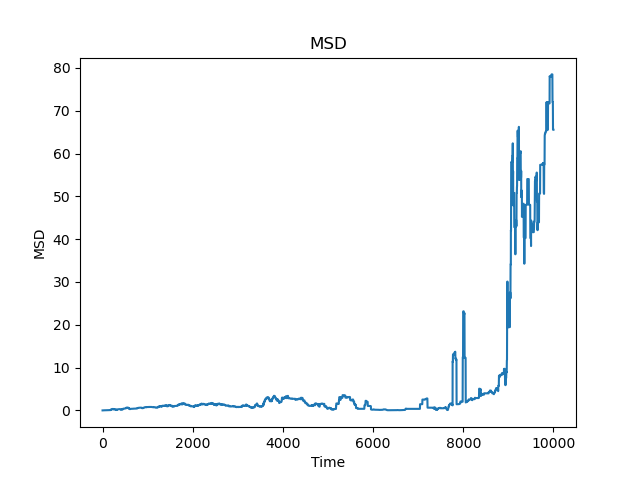

In [128]:
#np.shape(mean_square_displacements)
plt.figure()
plt.title("MSD")
plt.plot(np.arange(0,10000),mean_square_displacements)
plt.xlabel("Time")
plt.ylabel("MSD")

# Calculating Angular Displacement

In [133]:
r_large

3.183098861837907

In [132]:
np.mean(p_small,axis=0)

array([-0.10290494,  3.16700398,  0.04953495])

In [143]:
def calculate_circle_center_of_mass(ring):
    return np.mean(ring,axis=0)

def calculate_vector_magnitude(v):
    return np.sqrt(np.sum(np.square(v)))

def calculate_angular_displacement(position_time_tensor):
   
    #Extract the small ring positions
    p_small = position_time_tensor[:,:,small_ring_carbon_indices[0]:small_ring_carbon_indices[1]]
        
    #Extract the large ring positions

    p_large = position_time_tensor[:,:,large_ring_carbon_indices[0]:large_ring_carbon_indices[1]]
    
    #Find the closest monomer to each bead for the initial position, transposing just to give the matrix the right shape 
    initial_closest_monomers_to_each_bead = find_closest_monomer(
        p_small[0,:,:].T,
        p_large[0,:,:].T
    )
    
    initial_index = int(np.mean(initial_closest_monomers_to_each_bead))
    
    nt = np.shape(position_time_tensor)[0]
    angular_displacement = np.zeros(nt)    
    
    for i in range(nt):
    
        small_center = calculate_circle_center_of_mass(p_small[i,:,:].T)
        large_center = calculate_circle_center_of_mass(p_large[i,:,:].T)
        
        initial_closest_monomer_position = p_large[i,:,initial_index]
        r_o_L = large_center - initial_closest_monomer_position
        r_s_com_t = small_center - initial_closest_monomer_position
        theta = np.arccos(np.dot(r_o_L,r_s_com_t)/(calculate_vector_magnitude(r_o_L)*calculate_vector_magnitude(r_s_com_t)))
        angular_displacement[i] = 180*theta/np.pi
        
    return angular_displacement
    
    
     

In [144]:
angular_displacement = calculate_angular_displacement(position_time_tensor)

Text(0.5, 0, 'Time')

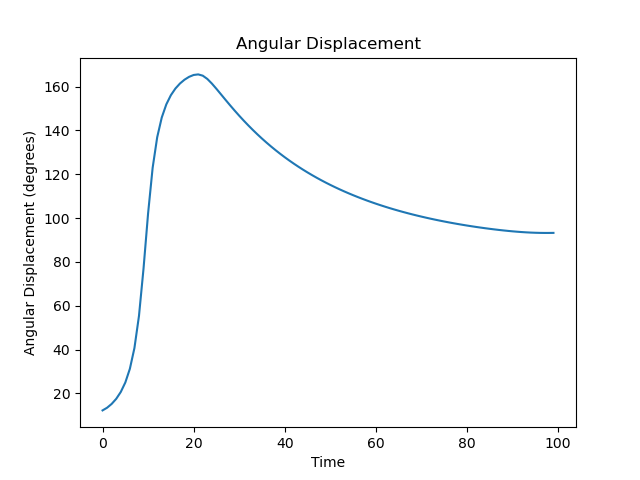

In [149]:
plt.figure()
plt.plot(np.arange(0,100),angular_displacement[0:100])
plt.title("Angular Displacement")
plt.ylabel("Angular Displacement (degrees)")
plt.xlabel("Time")